# null importance: feature selection

In [1]:
import pandas as pd
import numpy as np
import glob
import pickle as pkl
from models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def get_feature_importance(model):
    # return np.log1p(model.estimator.feature_importance(importance_type='gain', iteration=model.estimator.best_iteration))
    return model.estimator.feature_importance(importance_type='gain', iteration=model.estimator.best_iteration)

In [3]:
model_name = "lgb033_gbdt"

feature_importance_df = pd.DataFrame()
for i in range(6):
    part = pd.read_csv("./models/lgb033.csv")
    model = load_model("./models/{}_{}.pkl".format(model_name, i))

    part["fi"] = get_feature_importance(model)
    feature_importance_df = pd.concat([feature_importance_df, part], axis=0)

[info] load model : ./models/lgb033_gbdt_0.pkl
[info] load model : ./models/lgb033_gbdt_1.pkl
[info] load model : ./models/lgb033_gbdt_2.pkl
[info] load model : ./models/lgb033_gbdt_3.pkl
[info] load model : ./models/lgb033_gbdt_4.pkl
[info] load model : ./models/lgb033_gbdt_5.pkl


In [4]:
def load_lgb_if(model_name, nsplit, features_fn):
    feature_importance_df = pd.DataFrame()
    for i in range(nsplit):
        part = pd.read_csv(features_fn)
        model = load_model("./models/{}_{}.pkl".format(model_name, i))

        part["fi"] = get_feature_importance(model)
        feature_importance_df = pd.concat([feature_importance_df, part], axis=0)
    return feature_importance_df

In [5]:
nsplit = 6
features_fn = "./models/lgb033.csv"

fi024 = load_lgb_if("lgb033_gbdt", nsplit, features_fn)
fi024_null = load_lgb_if("lgb033_gbdt_null", nsplit, features_fn)

[info] load model : ./models/lgb033_gbdt_0.pkl
[info] load model : ./models/lgb033_gbdt_1.pkl
[info] load model : ./models/lgb033_gbdt_2.pkl
[info] load model : ./models/lgb033_gbdt_3.pkl
[info] load model : ./models/lgb033_gbdt_4.pkl
[info] load model : ./models/lgb033_gbdt_5.pkl
[info] load model : ./models/lgb033_gbdt_null_0.pkl
[info] load model : ./models/lgb033_gbdt_null_1.pkl
[info] load model : ./models/lgb033_gbdt_null_2.pkl
[info] load model : ./models/lgb033_gbdt_null_3.pkl
[info] load model : ./models/lgb033_gbdt_null_4.pkl
[info] load model : ./models/lgb033_gbdt_null_5.pkl


In [6]:
avg_fi_cmp = pd.DataFrame()
avg_fi_cmp["fi"] = fi024.groupby("feature_name").fi.mean()
avg_fi_cmp["fi_null"] = fi024_null.groupby("feature_name").fi.mean()
avg_fi_cmp["fi_complex"] = (avg_fi_cmp.fi + 1) / (avg_fi_cmp.fi_null + 1)

for col in avg_fi_cmp.columns:
    avg_fi_cmp[col] = np.log1p(avg_fi_cmp[col])

In [7]:
avg_fi_cmp.sort_values("fi_complex").tail(150).head(20)

,fi,fi_null,fi_complex
feature_name,,,
nmf100_9_nmf100,7.375710,0.000000,7.376336
nmf100_57_nmf100,7.388293,0.000000,7.388911
purchase_hour_6_hist_trans,7.401176,0.000000,7.401786
newk_new_duration_var_newk,11.846878,4.441963,7.405524
month_lag_-8_hist_trans,7.414015,0.000000,7.414618
newk_hist_month_min_newk,7.425809,0.000000,7.426405
installments_1_hist_trans,10.553001,3.113204,7.440384
newk_new_Children_day_2017_mean_newk,7.464665,0.000000,7.465238
ratio_1_lag2_monthly_pmax,11.784811,4.289845,7.495522


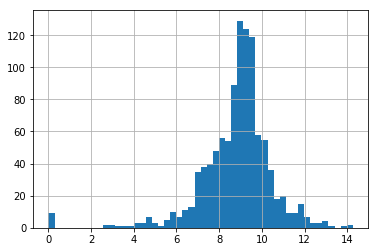

In [8]:
avg_fi_cmp.fi.hist(bins=50)

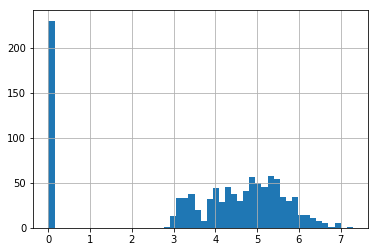

In [9]:
avg_fi_cmp.fi_null.hist(bins=50)

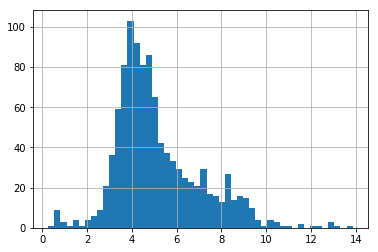

In [10]:
avg_fi_cmp.fi_complex.hist(bins=50)

In [11]:
avg_fi_cmp.to_csv("./models/lgb034_fi.csv")

In [12]:
avg_fi_cmp[avg_fi_cmp.fi_complex > 8].shape

(113, 3)

In [13]:
avg_fi_cmp[avg_fi_cmp.fi_complex > 4.25].shape

(655, 3)

In [14]:
avg_fi_cmp_st = avg_fi_cmp.sort_values("fi_complex").reset_index()

In [15]:
avg_fi_cmp_st.shape[0]

1052

In [16]:
avg_fi_cmp_st.sort_values("fi").head(800).tail(50)

,feature_name,fi,fi_null,fi_complex
361,sum_1_lag5_monthly_merchant_pmax_abs,9.513109,5.374676,4.154254
472,ratio_dura6_duar_count,9.515140,5.050284,4.476297
381,sum_4_lag-2_monthly_merchant_pmax,9.522692,5.337839,4.199963
176,ratio_2_lag12_monthly_merchant_avg_std_abs,9.523662,5.952822,3.598584
319,fastica50_17_fastica50,9.524029,5.515099,4.026920
249,fastica50_20_fastica50,9.526679,5.710655,3.837800
355,kernelpca_8_kernelpca,9.529621,5.406769,4.138920
520,ratio_3_lag-3_monthly_merchant_avg_std,9.533074,4.890627,4.652035
492,newk_new_Mothers_Day_2018_mean_newk,9.536790,4.982517,4.564740
464,newk_hist_purchase_date_average_newk,9.536865,5.085896,4.462569


In [17]:
avg_fi_cmp_st[avg_fi_cmp_st.feature_name.apply(lambda x: x.startswith("kernelpca"))]

,feature_name,fi,fi_null,fi_complex
31,kernelpca_31_kernelpca,9.397654,6.880714,2.594555
33,kernelpca_42_kernelpca,8.483442,5.935325,2.623436
38,kernelpca_47_kernelpca,8.943040,6.291580,2.719631
41,kernelpca_23_kernelpca,9.259627,6.543875,2.779811
63,kernelpca_41_kernelpca,9.267258,6.283393,3.033224
66,kernelpca_21_kernelpca,8.624009,5.618057,3.054257
71,kernelpca_39_kernelpca,9.238809,6.173895,3.110516
72,kernelpca_6_kernelpca,9.194047,6.120134,3.119116
76,kernelpca_38_kernelpca,8.901333,5.794431,3.150670
79,kernelpca_28_kernelpca,8.940941,5.824301,3.159992


In [18]:
avg_fi_cmp_st[avg_fi_cmp_st.feature_name.apply(lambda x: x.startswith("fastica"))]

,feature_name,fi,fi_null,fi_complex
19,fastica50_1_fastica50,8.861777,6.957727,2.042911
26,fastica50_46_fastica50,9.175337,6.870594,2.399857
27,fastica50_2_fastica50,8.751000,6.430005,2.414646
29,fastica50_25_fastica50,8.997506,6.560652,2.520676
48,fastica50_15_fastica50,9.194260,6.403436,2.850385
49,fastica50_24_fastica50,8.826876,6.036019,2.850416
55,fastica50_5_fastica50,8.778826,5.890600,2.942406
59,fastica50_19_fastica50,8.786665,5.846825,2.991364
65,fastica50_23_fastica50,8.907405,5.904244,3.051599
67,fastica50_11_fastica50,8.784186,5.770536,3.061594


In [19]:
avg_fi_cmp.sort_values("fi_complex").head(100)

,fi,fi_null,fi_complex
feature_name,,,
merchant_category_id_68_new_trans,2.761880,3.918737,0.273436
city_id_179_hist_trans,0.000000,0.000000,0.693147
city_id_212_new_trans,0.000000,0.000000,0.693147
subsector_id_40_hist_trans,0.000000,0.000000,0.693147
state_id_10_hist_trans,0.000000,0.000000,0.693147
state_id_12_new_trans,0.000000,0.000000,0.693147
subsector_id_26_hist_trans,0.000000,0.000000,0.693147
state_id_22_hist_trans,0.000000,0.000000,0.693147
merchant_category_id_544_new_trans,0.000000,0.000000,0.693147


In [20]:
avg_fi_cmp.sort_values("fi_complex").tail(100)

,fi,fi_null,fi_complex
feature_name,,,
nmf100_40_nmf100,8.205776,0.000000,8.206049
purchase_hour_4_hist_trans,8.210399,0.000000,8.210670
nmf100_46_nmf100,8.240470,0.000000,8.240734
nmf100_99_nmf100,8.246256,0.000000,8.246518
month_lag_min_hist_trans,8.247067,0.000000,8.247329
ratio_4_lag4_monthly_pmax_abs,8.250091,0.000000,8.250352
nmf100_10_nmf100,8.264422,0.000000,8.264680
sum_3_lag-6_monthly_psum,8.265980,0.000000,8.266237
subsector_id_classes_hist_trans,8.270859,0.000000,8.271115
